# Analytics

## Librerías

In [3]:
import yaml
import awswrangler as wr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Parámetros de configuración

In [7]:
with open('config.yaml') as f:
    config = yaml.safe_load(f)

DATABASE_NAME = config["aws"]["database_name"]
BUCKET_NAME = config["aws"]["bucket_name"]
ATHENA_OUTPUT = config["aws"]["athena_output"]

## Extrae los datos de Athena

In [9]:
mensual = wr.athena.read_sql_query(
    sql="SELECT * FROM mensual",
    database=DATABASE_NAME,
    s3_output=f's3://{BUCKET_NAME}/{ATHENA_OUTPUT}'
)

print("Datos descargados de Athena:")
print(mensual.head())

Datos descargados de Athena:
         date  tipo_de_cambio  tasa_de_interes  inflacion
0  2025-02-01       20.457137         9.607143       0.28
1  2025-01-01       20.549018        10.000000       0.29
2  2024-12-01       20.266055        10.153226       0.38
3  2024-07-01       18.111691        11.000000       1.05
4  2024-06-01       18.217370        11.000000       0.38


## Regresiones lineales

In [11]:
def plot_regression(x, y, xlabel, ylabel, title):
    # Ajuste lineal con numpy.polyfit (ajuste de primer grado)
    slope, intercept = np.polyfit(x, y, 1)
    line = slope * x + intercept
    
    plt.figure(figsize=(8,6))
    plt.scatter(x, y, color='blue', alpha=0.7, label="Datos")
    plt.plot(x, line, color='red', linewidth=2, label=f"Fit: y={slope:.2f}x+{intercept:.2f}")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

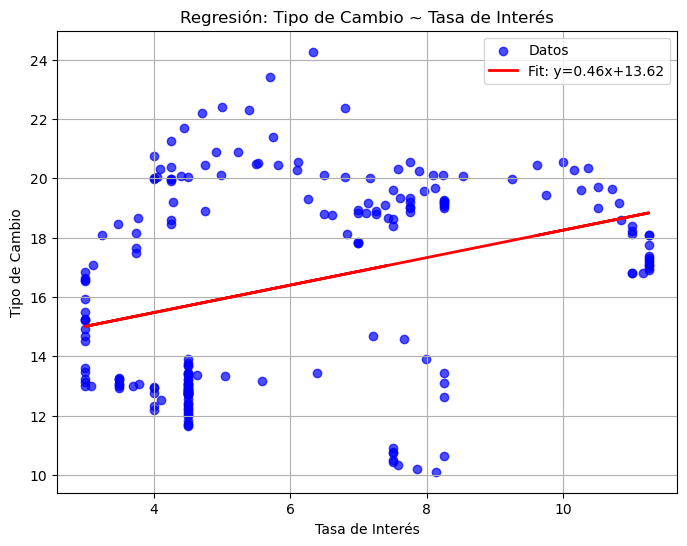

In [12]:
plot_regression(mensual['tasa_de_interes'], mensual['tipo_de_cambio'], 
                "Tasa de Interés", "Tipo de Cambio", "Regresión: Tipo de Cambio ~ Tasa de Interés")

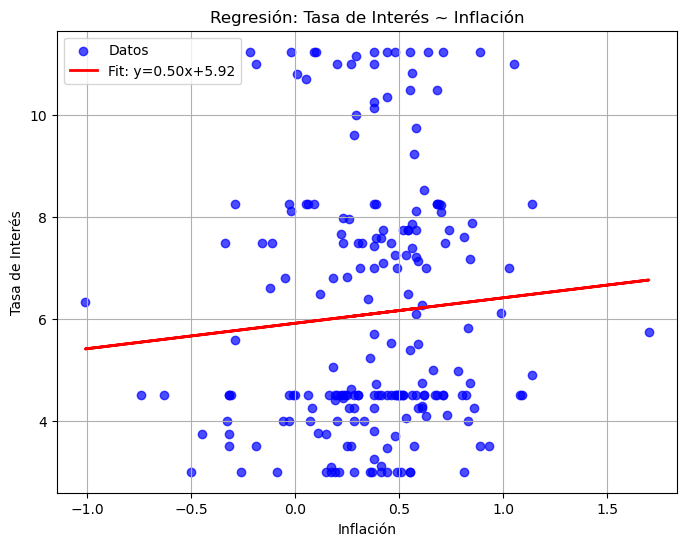

In [13]:
plot_regression(mensual['inflacion'], mensual['tasa_de_interes'], 
                "Inflación", "Tasa de Interés", "Regresión: Tasa de Interés ~ Inflación")

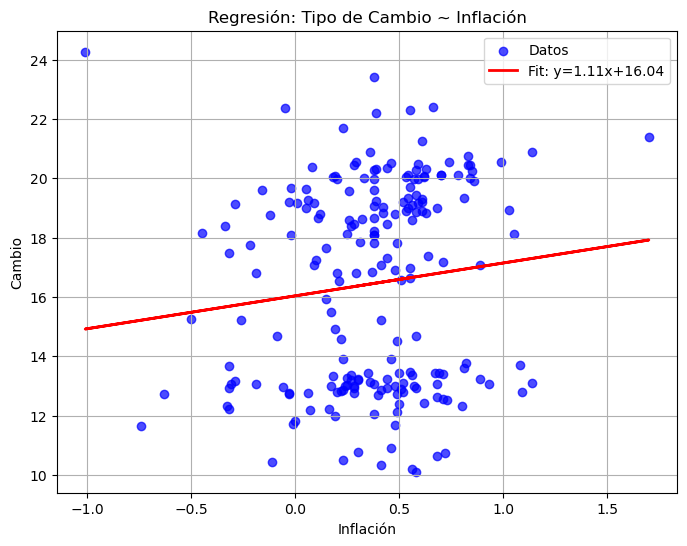

In [15]:
plot_regression(mensual['inflacion'], mensual['tipo_de_cambio'], 
                "Inflación", "Cambio", "Regresión: Tipo de Cambio ~ Inflación")